Pandas
======

- Provides a powerful `DataFrame` object.
- Makes it easy to deal with "Tabular" data.
- Very easy to read, process and visualize data.
- See http://pandas.pydata.org

In [72]:
%matplotlib inline
import numpy as np
import pandas as pd


In [73]:
x = np.linspace(0, 2*np.pi, 100)
sin = np.sin(x)
cos = np.cos(x)

df = pd.DataFrame({'x': x, 'sin': sin, 'cos': cos})
# OR
# df = pd.DataFrame(dict(x=x, sin=sin, cos=cos))

In [9]:
df.head() # or df.tail()

,cos,sin,x
0,1.000000,0.000000,0.000000
1,0.997987,0.063424,0.063467
2,0.991955,0.126592,0.126933
3,0.981929,0.189251,0.190400
4,0.967949,0.251148,0.253866


In [10]:
df.describe()

,cos,sin,x
count,100.000000,1.000000e+02,100.000000
mean,0.010000,-2.021286e-17,3.141593
std,0.714143,7.071068e-01,1.841258
min,-0.999497,-9.998741e-01,0.000000
25%,-0.701475,-6.957328e-01,1.570796
50%,0.015858,-1.224647e-16,3.141593
75%,0.723734,6.957328e-01,4.712389
max,1.000000,9.998741e-01,6.283185


In [31]:
df1 = df[:3]
df1.describe()

,cos,sin,x,sincos
count,3.000000,3.000000,3.000000,3.000000
mean,0.329980,0.063339,0.063467,0.062957
std,1.151801,0.063296,0.063467,0.062788
min,-1.000000,0.000000,0.000000,0.000000
25%,-0.004023,0.031712,0.031733,0.031648
50%,0.991955,0.063424,0.063467,0.063296
75%,0.994971,0.095008,0.095200,0.094435
max,0.997987,0.126592,0.126933,0.125574


In [32]:
df.x[:5]

0    0.000000
1    0.063467
2    0.126933
3    0.190400
4    0.253866
Name: x, dtype: float64

In [15]:
df['x'][:5]

0    0.000000
1    0.063467
2    0.126933
3    0.190400
4    0.253866
Name: x, dtype: float64

In [17]:
df.columns

Index([u'cos', u'sin', u'x'], dtype='object')

In [35]:
len(df)

100

In [46]:
df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

In [47]:
df1 = df.copy()
df1.head()

,cos,sin,x,sincos
0,-1.000000,0.000000,0.000000,-0.000000
1,0.997987,0.063424,0.063467,0.063296
2,0.991955,0.126592,0.126933,0.125574
3,0.981929,0.189251,0.190400,0.185831
4,0.967949,0.251148,0.253866,0.243098


Indexing
=========

- Give me a data frame, where all cosine values are >0.

In [81]:
condition = df.cos > 0.0
print len(condition)

100


In [83]:
df.sin[49]

0.031727933498067656

In [98]:
df_positive_cos = df[condition]
df_positive_cos.describe()

,cos,sin,x
count,50.000000,5.000000e+01,50.000000
mean,0.650280,1.397520e-17,3.141593
std,0.306625,7.034880e-01,2.448204
min,0.047582,-9.988673e-01,0.000000
25%,0.415415,-6.782562e-01,0.777465
50%,0.723734,-1.224647e-16,3.141593
75%,0.928368,6.782562e-01,5.505720
max,1.000000,9.988673e-01,6.283185


In [39]:
# This adds a new column sincos
df['sincos'] = df.sin*df.cos

In [40]:
df.describe()

,cos,sin,x,sincos
count,100.000000,1.000000e+02,100.000000,1.000000e+02
mean,-0.010000,-2.021286e-17,3.141593,4.905934e-18
std,0.714143,7.071068e-01,1.841258,3.535534e-01
min,-1.000000,-9.998741e-01,0.000000,-4.999371e-01
25%,-0.712422,-6.957328e-01,1.570796,-3.478664e-01
50%,-0.015866,-1.224647e-16,3.141593,-1.224647e-16
75%,0.689816,6.957328e-01,4.712389,3.478664e-01
max,1.000000,9.998741e-01,6.283185,4.999371e-01


Plotting
=========

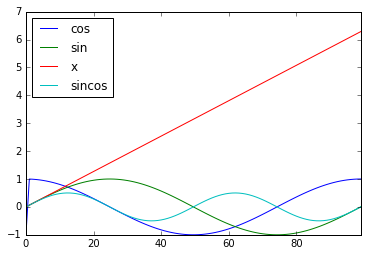

In [48]:
df.plot() 
# or
#df.plot.line()

Notice that everything is plotted w.r.t. the index!
Let us fix this!

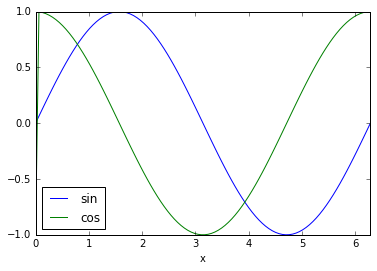

In [49]:
df.plot(x='x', y=['sin', 'cos'])

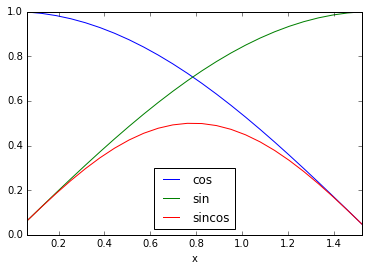

In [50]:
# See what this does

df[(df.sin > 0.0) & (df.cos > 0.0)].plot.line(x='x')

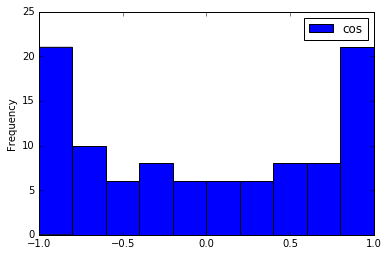

In [54]:
df.plot.hist(y='cos')
# or
#df.plot(y='cos', kind='hist')

Input and output CSV and other file formats
--------------------------------------------

- `pd.read_csv()`
- `df.to_csv()`
- Can read/save to clip board.
- Directly read from URLs.

In [56]:
df.to_csv('sincos.csv', index=False)

In [58]:
df1 = pd.read_csv('sincos.csv')
df1.head()

,cos,sin,x,sincos
0,-1.000000,0.000000,0.000000,-0.000000
1,0.997987,0.063424,0.063467,0.063296
2,0.991955,0.126592,0.126933,0.125574
3,0.981929,0.189251,0.190400,0.185831
4,0.967949,0.251148,0.253866,0.243098


In [100]:
print df[:5].to_latex()

\begin{tabular}{lrrr}
\toprule
{} &       cos &       sin &         x \\
\midrule
0 &  1.000000 &  0.000000 &  0.000000 \\
1 &  0.997987 &  0.063424 &  0.063467 \\
2 &  0.991955 &  0.126592 &  0.126933 \\
3 &  0.981929 &  0.189251 &  0.190400 \\
4 &  0.967949 &  0.251148 &  0.253866 \\
\bottomrule
\end{tabular}



In [101]:
print df[:5].to_latex(index=False)

\begin{tabular}{rrr}
\toprule
      cos &       sin &         x \\
\midrule
 1.000000 &  0.000000 &  0.000000 \\
 0.997987 &  0.063424 &  0.063467 \\
 0.991955 &  0.126592 &  0.126933 \\
 0.981929 &  0.189251 &  0.190400 \\
 0.967949 &  0.251148 &  0.253866 \\
\bottomrule
\end{tabular}



In [107]:
from IPython.display import HTML
HTML(df[:5].to_html())

,cos,sin,x
0,1.000000,0.000000,0.000000
1,0.997987,0.063424,0.063467
2,0.991955,0.126592,0.126933
3,0.981929,0.189251,0.190400
4,0.967949,0.251148,0.253866


Selecting from the clipboard
=============================

- Let us select data from wikipedia:
- https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita

Select some data and then do this:


In [109]:
df2 = pd.read_clipboard()
df2.head()

,1,Luxembourg,"103,187"
0,2,Switzerland,"82,178"
1,3,Qatar,"78,829"
2,4,Norway,"76,266"
3,5,United States,"55,904"
4,6,Singapore,"53,224"


Exercise
--------

Look at the following:

- https://data.gov.in/catalog/annual-and-seasonal-maximum-temperature-india
- https://data.gov.in/catalog/annual-and-seasonal-minimum-temperature-india

Exercise
---------

- Easy to repeat the SSLC example with pandas.
- File is at: http://www.aero.iitb.ac.in/~prabhu/tmp/sslc1.csv

Consider a smaller file first:

- File is at: http://www.aero.iitb.ac.in/~prabhu/tmp/sslc_small.csv


In [110]:
import pandas as pd
url = 'http://www.aero.iitb.ac.in/~prabhu/tmp/sslc_small.csv'
df = pd.read_csv(url)
df.head()

,region;roll_number;name;sl;fl;math;sci;ss;total;pass;withheld;
0,A;010001;ABINESH T N;053;036;28;16;44;177;;;
1,A;010002;ANAND R;058;037;42;35;40;212;P;;
2,A;010003;ANISH M;072;056;71;55;70;324;P;;
3,A;010004;ANITHRAJ S;087;064;83;58;65;357;P;;
4,A;010005;ARIDHAS N;059;045;50;35;48;237;P;;


In [112]:
df = pd.read_csv(url, sep=';')
df.head()

,region,roll_number,name,sl,fl,math,sci,ss,total,pass,withheld,Unnamed: 11
0,A,10001,ABINESH T N,53,36,28,16,44,177,NaN,NaN,NaN
1,A,10002,ANAND R,58,37,42,35,40,212,P,NaN,NaN
2,A,10003,ANISH M,72,56,71,55,70,324,P,NaN,NaN
3,A,10004,ANITHRAJ S,87,64,83,58,65,357,P,NaN,NaN
4,A,10005,ARIDHAS N,59,45,50,35,48,237,P,NaN,NaN


In [113]:
df = pd.read_csv(url, sep=';', na_values=['AA'])
df.head()


,region,roll_number,name,sl,fl,math,sci,ss,total,pass,withheld,Unnamed: 11
0,A,10001,ABINESH T N,53,36,28,16,44,177,NaN,NaN,NaN
1,A,10002,ANAND R,58,37,42,35,40,212,P,NaN,NaN
2,A,10003,ANISH M,72,56,71,55,70,324,P,NaN,NaN
3,A,10004,ANITHRAJ S,87,64,83,58,65,357,P,NaN,NaN
4,A,10005,ARIDHAS N,59,45,50,35,48,237,P,NaN,NaN


In [114]:
df.describe()

,roll_number,sl,fl,math,sci,ss,total,withheld,Unnamed: 11
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0,0
mean,10005.000000,62.777778,48.000000,54.444444,39.888889,51.555556,256.666667,NaN,NaN
std,2.738613,16.338435,12.806248,24.393191,18.237629,16.333333,85.812295,NaN,NaN
min,10001.000000,43.000000,36.000000,25.000000,16.000000,35.000000,161.000000,NaN,NaN
25%,10003.000000,53.000000,37.000000,42.000000,35.000000,40.000000,198.000000,NaN,NaN
50%,10005.000000,59.000000,45.000000,49.000000,35.000000,44.000000,237.000000,NaN,NaN
75%,10007.000000,72.000000,56.000000,71.000000,55.000000,65.000000,324.000000,NaN,NaN
max,10009.000000,87.000000,71.000000,97.000000,71.000000,81.000000,407.000000,NaN,NaN


More information
==================

- http://pandas.pydata.org
- Go through the tutorials here:

http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/tree/v0.1/cookbook/

- Go over chapter 1 to 7.